## STEP 0: PROBLEM STATEMENT

In this case study, you have been provided with images of traffic signs and the goal is to train a Deep Network to classify them

The dataset contains 43 different classes of images.

## STEP 1: LOAD DATA AND IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
# The pickle module implements binary protocols for serializing and de-serializing a Python object structure.
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [4]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [5]:
X_train.shape

(34799, 32, 32, 3)

In [6]:
y_train.shape

(34799,)

In [8]:
X_validation.shape

(4410, 32, 32, 3)

In [9]:
y_validation.shape

(4410,)

In [10]:
X_test.shape

(12630, 32, 32, 3)

In [11]:
y_test.shape

(12630,)

## STEP 2: IMAGE EXPLORATION

36

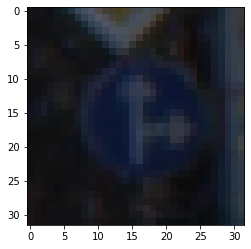

In [12]:
i = 1000
plt.imshow(X_train[i])
y_train[i]

31

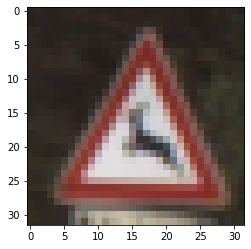

In [14]:
i = 500
plt.imshow(X_train[i])
y_train[i]

## STEP 3: DATA PREPARATION

In [16]:
# Shuffleing images

from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [20]:
# Changing images to grayscale

X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)
X_validation_gray = np.sum(X_validation/3, axis = 3, keepdims = True)

In [19]:
X_train_gray.shape

(34799, 32, 32, 1)

In [22]:
X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

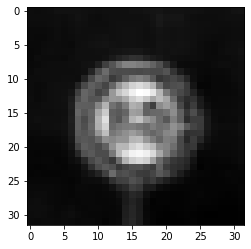

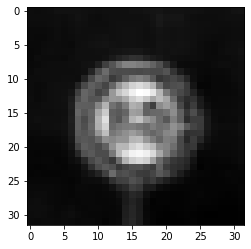

In [26]:
i = 610
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

## STEP 4: MODEL TRAINING

The model consists of the following layers:

STEP 1: THE FIRST CONVOLUTIONAL LAYER #1
Input = 32x32x1
Output = 28x28x6
Output = (Input-filter+1)/Stride* => (32-5+1)/1=28
Used a 5x5 Filter with input depth of 3 and output depth of 6
Apply a RELU Activation function to the output
pooling for input, Input = 28x28x6 and Output = 14x14x6
* Stride is the amount by which the kernel is shifted when the kernel is passed over the image.

STEP 2: THE SECOND CONVOLUTIONAL LAYER #2
Input = 14x14x6
Output = 10x10x16
Layer 2: Convolutional layer with Output = 10x10x16
Output = (Input-filter+1)/strides => 10 = 14-5+1/1
Apply a RELU Activation function to the output
Pooling with Input = 10x10x16 and Output = 5x5x16
STEP 3: FLATTENING THE NETWORK
Flatten the network with Input = 5x5x16 and Output = 400

STEP 4: FULLY CONNECTED LAYER

Layer 3: Fully Connected layer with Input = 400 and Output = 120
Apply a RELU Activation function to the output

STEP 5: ANOTHER FULLY CONNECTED LAYER

Layer 4: Fully Connected Layer with Input = 120 and Output = 84
Apply a RELU Activation function to the output

STEP 6: FULLY CONNECTED LAYER

Layer 5: Fully Connected layer with Input = 84 and Output = 43

In [29]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [30]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32,32,1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units=120, activation='relu'))

cnn_model.add(Dense(units=84, activation='relu'))

cnn_model.add(Dense(units=43, activation = 'softmax'))

In [32]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [34]:
history = cnn_model.fit(X_train_gray_norm,
                        y_train,
                        batch_size=500,
                        nb_epoch=50,
                        verbose=1,
                        validation_data = (X_validation_gray_norm,y_validation))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



C:\Users\CO20109035\AppData\Local\Anac\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  




Train on 34799 samples, validate on 4410 samples
Epoch 1/50





34799/34799 [==============================] - 17s 498us/step - loss: 3.1327 - acc: 0.1795 - val_loss: 2.7236 - val_acc: 0.3145
Epoch 2/50
34799/34799 [==============================] - 18s 514us/step - loss: 1.7016 - acc: 0.5292 - val_loss: 1.4395 - val_acc: 0.6093
Epoch 3/50
34799/34799 [==============================] - 18s 519us/step - loss: 0.9448 - acc: 0.7316 - val_loss: 1.0457 - val_acc: 0.6766
Epoch 4/50
34799/34799 [==============================] - 18s 522us/step - loss: 0.6585 - acc: 0.8173 - val_loss: 0.8435 - val_acc: 0.7456
Epoch 5/50
34799/34799 [==============================] - 18s 522us/step - loss: 0.5026 - acc: 0.8639 - val_loss: 0.7510 - val_acc: 0.7773
Epoch 6/50
34799/34799 [==============================] - 19s 538us/step - loss: 0.4136 - acc: 0.8886 - val_loss: 0.6924 - val_acc: 0.8054
Epoch 7/50
34799/34799 [==============================] - 19s 548us/step - loss: 0.3563 - acc: 0.9051 - val_lo

## STEP 5: MODEL EVALUATION

In [39]:
score = cnn_model.evaluate(X_test_gray_norm, y_test,verbose=0)
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Accuracy : 0.8614


In [40]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [42]:
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

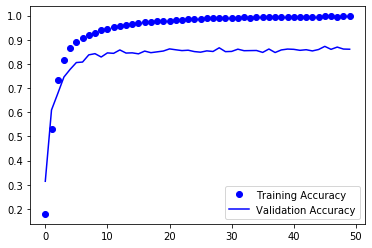

In [46]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

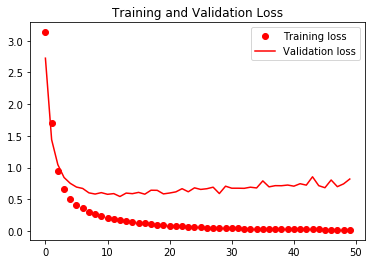

In [47]:
plt.plot(epochs, loss, 'ro', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

In [49]:
#get the predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test_gray_norm)
#get the indices to be plotted
y_true = y_test

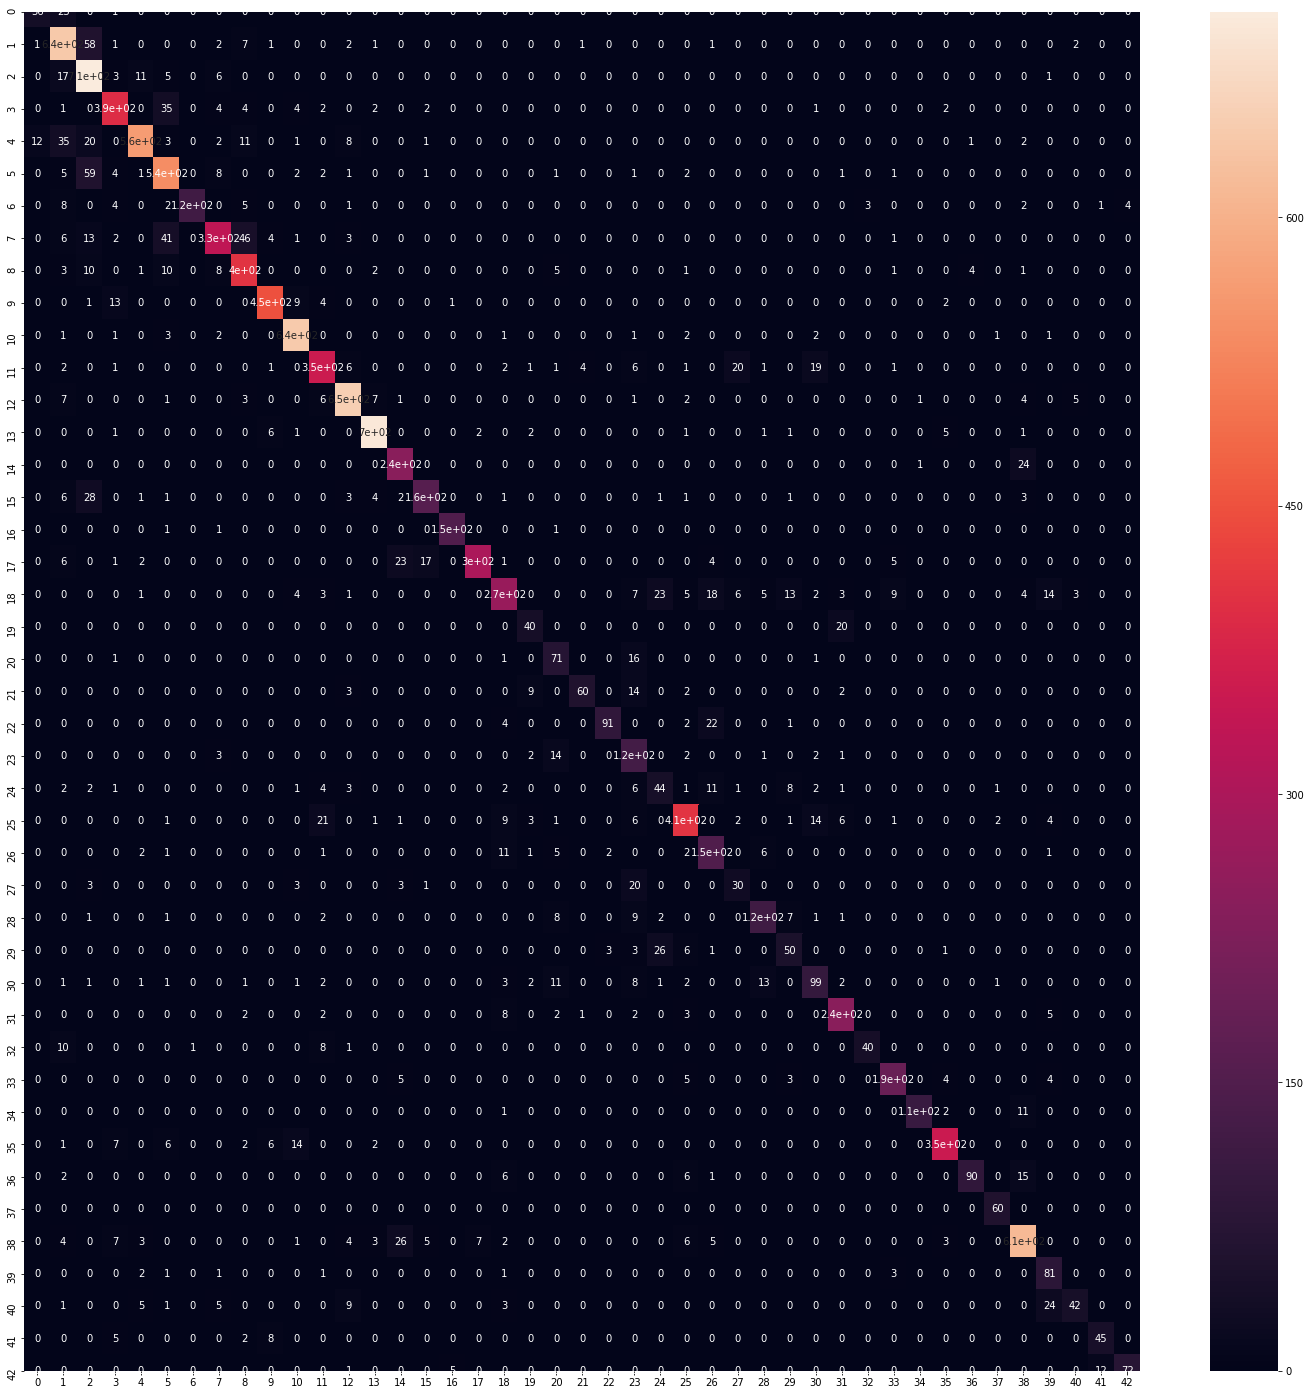

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

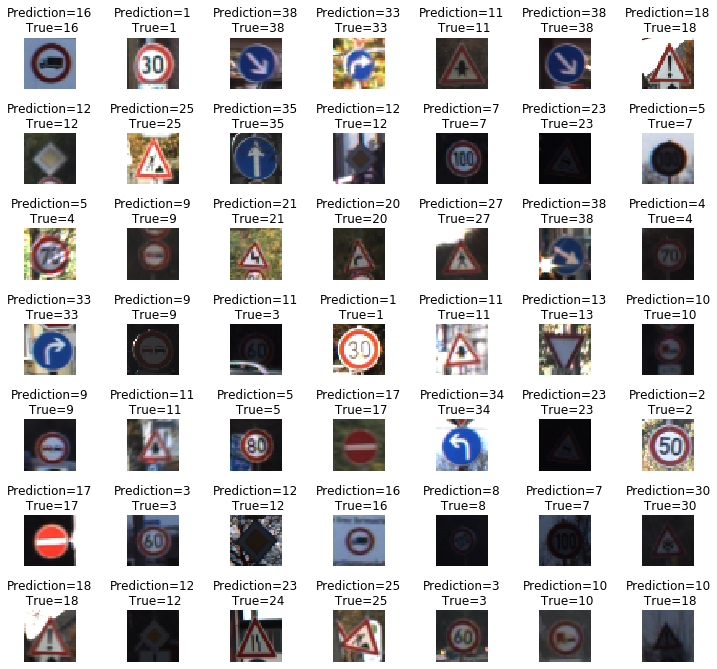

In [54]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction={}\n True={}".format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)
    